In [140]:
from jupyterthemes import jtplot
jtplot.style(ticks=True, grid=False, figsize=(10, 8))

*Import libraries:*

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

*Import CSV files:*

In [325]:
df = pd.DataFrame(pd.read_csv('RT v Cold RNAseq.csv'))

In [326]:
df.head()

,geneID,geneLength,RT-Expression,COLD-Expression,RT-FPKM,COLD-FPKM,log2 Ratio(COLD/RT),Up-Down-Regulation(COLD/RT),P-value,FDR,Symbol,Description,KEGG Orthology,GO Component,GO Function,GO Process,Blast nr
0,621156,605.0,0.0,100.23,0.001,17.03,14.055791,Up,1.770000e-31,1.920000e-29,Apoo-ps,"apolipoprotein O, pseudogene",K17536,GO:0031224//intrinsic component of membrane;GO...,-,GO:0010876//lipid localization;GO:0051234//est...,gi|148686520|gb|EDL18467.1|/5.1904e-116/1
1,93898,2741.0,0.0,205.21,0.001,7.06,12.785452,Up,9.180000e-64,3.100000e-61,Lass1,ceramide synthase 1,K05495;K04710,GO:0012505//endomembrane system;GO:0031090//or...,GO:0005102//receptor binding;GO:0016410//N-acy...,GO:0006672//ceramide metabolic process,gi|20149718|ref|NP_619588.1|/0/1
2,71760,2666.0,0.0,83.00,0.001,2.94,11.521600,Up,2.980000e-26,2.230000e-24,Agxt2l1,alanine-glyoxylate aminotransferase 2-like 1,K14286,GO:0043231//intracellular membrane-bounded org...,GO:0008483//transaminase activity;GO:0048037//...,GO:0019752//carboxylic acid metabolic process,gi|254675331|ref|NP_082183.2|/0/1
3,100303740,116.0,0.0,2.00,0.001,2.89,11.496854,Up,2.391280e-01,4.298818e-01,Snora75,"small nucleolar RNA, H/ACA box 75",-,-,-,-,-
4,100217415,248.0,0.0,5.00,0.001,2.47,11.270295,Up,2.859100e-02,9.097184e-02,Scarna6,small Cajal body-specific RNA 6,-,-,-,-,-


In [108]:
# Function to remove punctuation and numbers from Series
import string
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all numbers
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation and char not in string.digits]
    
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any punctuation and numbers
    return [word for word in nopunc.split()]

In [328]:
df['GO Process'] = df['GO Process'].apply(text_process)

# Join 'Go Process' list as string
for i in df['GO Process']:
    ''.join(i)
df['GO Process'] = df['GO Process'].astype(str)

# Check if we can select for specific processes
df[df['GO Process'].str.contains('lipid')].head()

,geneID,geneLength,RT-Expression,COLD-Expression,RT-FPKM,COLD-FPKM,log2 Ratio(COLD/RT),Up-Down-Regulation(COLD/RT),P-value,FDR,Symbol,Description,KEGG Orthology,GO Component,GO Function,GO Process,Blast nr
0,621156,605.0,0.0,100.23,0.001,17.03,14.055791,Up,1.770000e-31,1.920000e-29,Apoo-ps,"apolipoprotein O, pseudogene",K17536,GO:0031224//intrinsic component of membrane;GO...,-,"['GOlipid', 'localizationGOestablishment', 'of...",gi|148686520|gb|EDL18467.1|/5.1904e-116/1
16,11813,667.0,0.0,6.00,0.001,0.91,9.829723,Up,1.408516e-02,5.192368e-02,Apoc2,apolipoprotein C-II,-,GO:0034364//high-density lipoprotein particle;...,GO:0004857//enzyme inhibitor activity;GO:00198...,"['GOnegative', 'regulation', 'of', 'metabolic'...",gi|6753100|ref|NP_033825.1|/6.30707e-47/1
86,15450,1934.0,0.0,6.00,0.001,0.30,8.228819,Up,1.408516e-02,5.201108e-02,Lipc,"lipase, hepatic",K01046,GO:0005768//endosome;GO:0034358//plasma lipopr...,GO:0004091;GO:0005539//glycosaminoglycan bindi...,"['GOresponse', 'to', 'acidGOprotein', 'complex...",gi|31982278|ref|NP_032306.2|/0/1
128,72076,883.0,0.0,2.00,0.001,0.22,7.781360,Up,2.391280e-01,4.290029e-01,Mospd4,motile sperm domain containing 4,K06096,GO:0031090//organelle membrane;GO:0031224//int...,GO:0046983//protein dimerization activity;GO:0...,"['GOmembrane', 'lipid', 'metabolic', 'processG...",gi|148678035|gb|EDL09982.1|/2.23059e-100/1
139,77577,1819.0,0.0,4.00,0.001,0.21,7.714246,Up,5.803580e-02,1.568262e-01,Spns3,spinster homolog 3,K08202,GO:0031224//intrinsic component of membrane,-,"['GOtransportGOlipid', 'localization']",gi|58037493|ref|NP_084208.1|/0/1


*The data contains a lot of unlabeled genes and genes we're not interested in.  Remove unlabeled genes and focus on ones that are trending towards significance or are significantly different from one another.*

In [329]:
significant = df[(df['P-value'] <= .05) & (df['KEGG Orthology'] != '-')].copy()
significant.describe()

#this removes approximately 12K genes

,geneID,geneLength,RT-Expression,COLD-Expression,RT-FPKM,COLD-FPKM,log2 Ratio(COLD/RT),P-value,FDR
count,5.238000e+03,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000
mean,1.349011e+06,3844.479097,1217.412354,1175.092721,42.588085,42.376436,0.086175,0.008671,0.028954
std,1.109046e+07,2508.561551,2792.537110,2689.578670,133.058333,135.113214,1.483924,0.013148,0.039431
min,1.130200e+04,328.000000,0.000000,0.000000,0.001000,0.001000,-11.550747,0.000000,0.000000
25%,1.988150e+04,2110.000000,135.250000,132.000000,3.482500,3.820000,-0.369427,0.000002,0.000022
50%,6.774900e+04,3270.000000,455.500000,440.000000,12.105000,11.855000,0.124242,0.001172,0.006735
75%,2.072928e+05,4850.750000,1222.750000,1157.000000,32.625000,31.205000,0.364309,0.012920,0.048615
max,1.012436e+08,22489.000000,43299.000000,46224.000000,3000.430000,3078.040000,14.055791,0.049986,0.139832


*Looking at gene copy number change between two groups.*

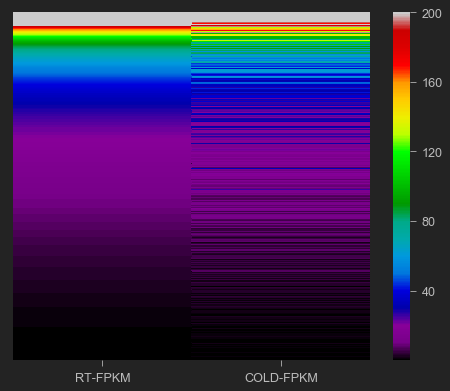

In [330]:
sns.heatmap(significant[['RT-FPKM', 'COLD-FPKM']].sort_values('RT-FPKM', ascending=False), 
            yticklabels=False, cbar=True, vmax=200, cmap='nipy_spectral')


*Focusing in on genes involved in lipid metabolism.  Here, I've used generic terms to be broad (e.g. 'metab' will select for metabolism and metabolic).*

In [331]:
lipid = significant[(significant['GO Process'].str.contains('fatty')) | (significant['GO Process'].str.contains('lip')) 
                   & (significant['GO Process'].str.contains('metab'))]
lipid.describe()

# This reduces the number of genes to 209

,geneID,geneLength,RT-Expression,COLD-Expression,RT-FPKM,COLD-FPKM,log2 Ratio(COLD/RT),P-value,FDR
count,2.090000e+02,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,2.090000e+02,2.090000e+02
mean,5.461873e+05,3959.390383,2007.879187,1922.198852,69.182880,65.563077,0.004798,7.280288e-03,2.483481e-02
std,6.922340e+06,2420.442969,4172.882255,3837.033666,206.315635,178.231925,1.494405,1.193903e-02,3.621200e-02
min,1.130300e+04,587.010000,0.000000,0.000000,0.001000,0.001000,-10.116344,3.140000e-154,5.510000e-151
25%,1.659000e+04,2270.660000,273.000000,275.000000,5.970000,6.560000,-0.301048,9.910000e-08,1.450000e-06
50%,2.235900e+04,3358.000000,778.000000,686.000000,18.790000,17.890000,0.115280,6.714480e-04,4.162693e-03
75%,7.455900e+04,4932.000000,1600.000000,1739.000000,56.890000,50.160000,0.287024,9.959020e-03,3.947398e-02
max,1.001349e+08,15467.000000,32936.000000,25876.000000,2449.700000,1965.820000,9.252665,4.860500e-02,1.369288e-01


*Check distribution on FPKM values*

C:\Users\micha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


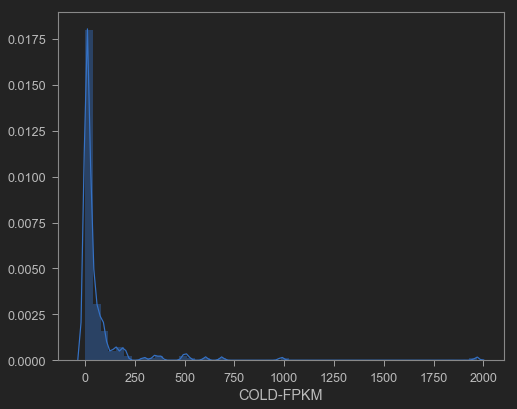

In [332]:
sns.distplot(lipid['COLD-FPKM'])

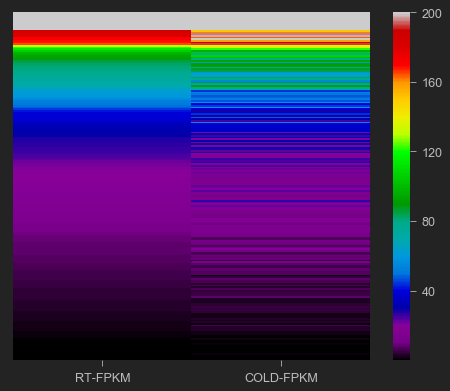

In [333]:
sns.heatmap(lipid[['RT-FPKM', 'COLD-FPKM']].sort_values('RT-FPKM', ascending=False), 
            yticklabels=False, cbar=True, vmax=200, cmap='nipy_spectral')

Find the top 50 genes with the biggest difference

In [334]:
lipid['sort'] = abs(lipid['log2 Ratio(COLD/RT)'])
top_lipid = lipid.sort_values(by = 'sort', ascending=False)[:50]
top_lipid.describe()

C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,geneID,geneLength,RT-Expression,COLD-Expression,RT-FPKM,COLD-FPKM,log2 Ratio(COLD/RT),P-value,FDR,sort
count,5.000000e+01,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,5.000000e+01,5.000000e+01,50.000000
mean,2.075538e+06,3624.782200,316.523000,273.334000,9.00584,8.147060,-0.015218,4.743278e-03,1.708433e-02,1.755074
std,1.415101e+07,2621.869486,454.143568,366.575467,13.25790,11.217893,3.037909,8.800744e-03,2.833012e-02,2.466978
min,1.140900e+04,872.000000,0.000000,0.000000,0.00100,0.001000,-10.116344,1.410000e-38,2.140000e-36,0.506729
25%,1.558750e+04,2040.205000,29.255000,27.250000,0.75250,0.987500,-0.620493,6.362500e-12,1.582750e-10,0.582754
50%,2.078300e+04,3009.500000,100.000000,105.500000,3.08000,3.470000,0.005005,2.010000e-05,1.835200e-04,0.821580
75%,9.780250e+04,4027.250000,374.000000,445.750000,12.82750,11.822500,0.881228,6.332495e-03,2.748152e-02,1.341089
max,1.001349e+08,15467.000000,1816.000000,1868.000000,62.36000,53.230000,9.252665,4.144260e-02,1.213276e-01,10.116344


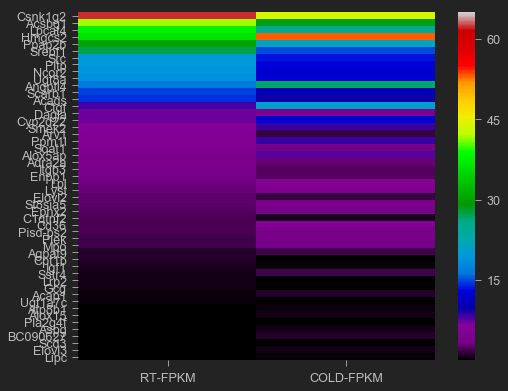

In [335]:
sns.heatmap(top_lipid[['RT-FPKM', 'COLD-FPKM']].sort_values('RT-FPKM', ascending=False), 
            yticklabels=top_lipid.sort_values('RT-FPKM', ascending=False)['Symbol'], cbar=True, vmax=65, 
            cmap='nipy_spectral')